<a href="https://colab.research.google.com/github/anildoferreira/projetos-pln/blob/main/weekly-studies/semana-07-atividade-formativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Formativa: Classificação de Textos com Unificação de Categorias

**Aluno:** Anildo Ferreira

**Objetivo:** Analisar o impacto da unificação de categorias similares na performance de um classificador de textos.

Este notebook irá executar o seguinte pipeline:
1.  **Análise Original:** Carregar o dataset "20 Newsgroups", treinar um classificador Naive Bayes e avaliar sua performance original.
2.  **Modificação:** Identificar e unificar as três subcategorias de religião em uma única categoria "religiao.unificada".
3.  **Nova Análise:** Treinar um novo classificador com os dados modificados e avaliar sua performance.
4.  **Conclusão:** Comparar a acurácia e as matrizes de confusão para responder às questões da atividade.

In [1]:
# Importações e Carregamento dos Dados
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Carrega os datasets de treino e teste
print("Carregando o dataset 20 Newsgroups...")
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Exibe as categorias originais
print(f"Número de categorias originais: {len(train.target_names)}")
print("Carregamento concluído.")

Carregando o dataset 20 Newsgroups...
Número de categorias originais: 20
Carregamento concluído.


---
### Parte 1: Modelo Original (Sem Modificação)

Primeiro, vamos treinar e avaliar o modelo com as 20 categorias originais para termos uma linha de base para comparação.

--- Treinando Modelo Original ---
Acurácia Original: 0.6062


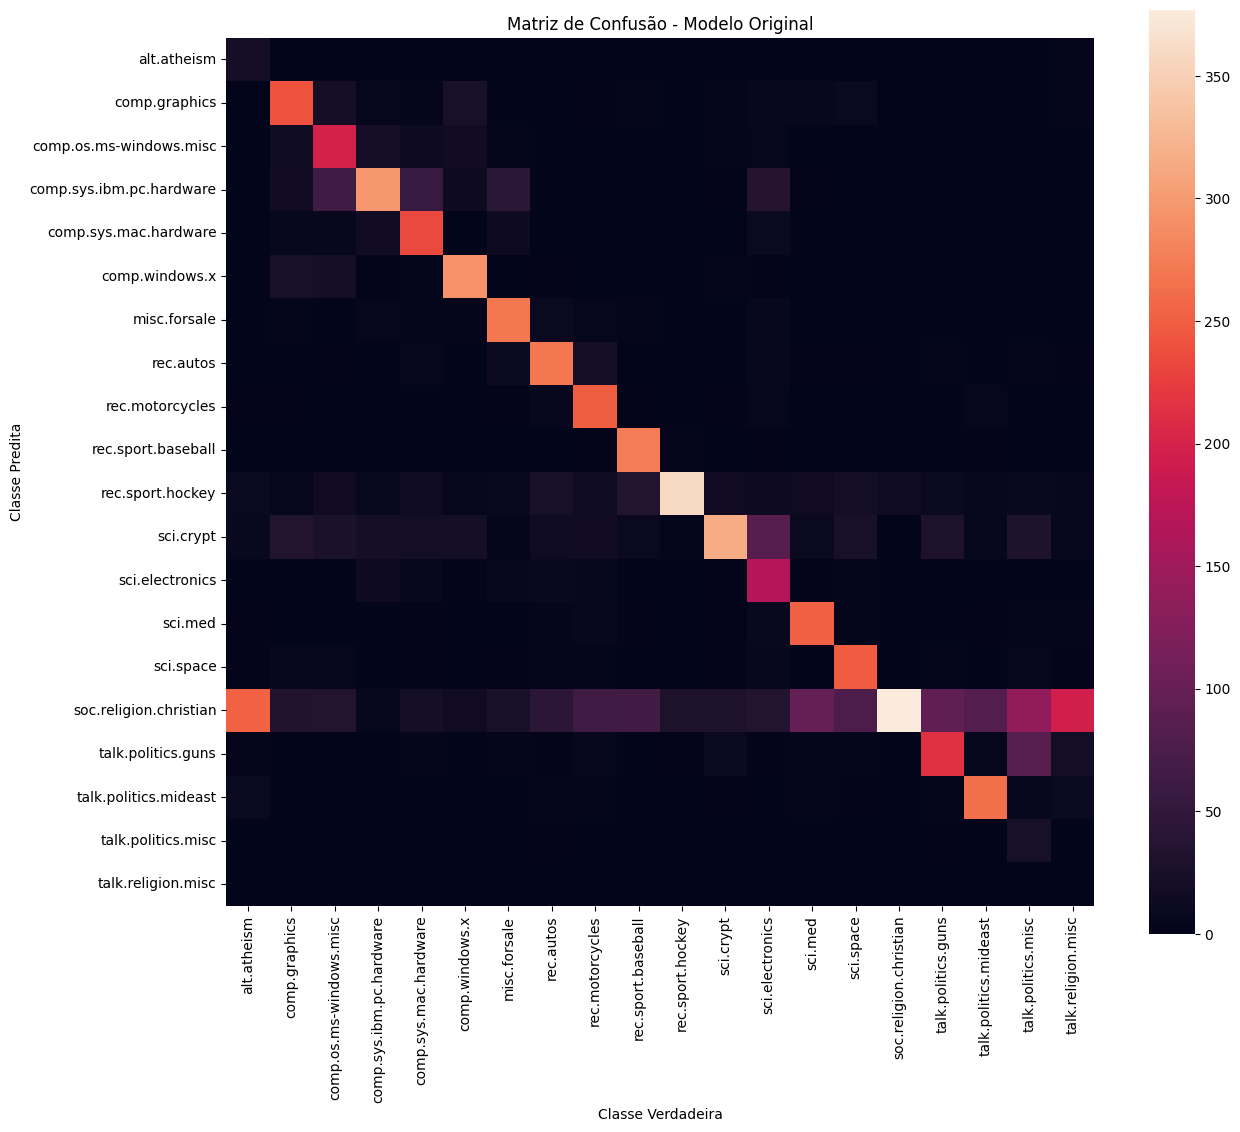

In [2]:
# Treinamento e Avaliação do Modelo Original
print("--- Treinando Modelo Original ---")
# Cria o pipeline: Vetorizador TF-IDF -> Classificador Multinomial Naive Bayes
model_original = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treina o modelo
model_original.fit(train.data, train.target)

# Faz as predições no conjunto de teste
labels_original = model_original.predict(test.data)

# Calcula a acurácia
acc_original = accuracy_score(test.target, labels_original)
print(f"Acurácia Original: {acc_original:.4f}")

# Gera a matriz de confusão
mat_original = confusion_matrix(test.target, labels_original)

# Plota a matriz de confusão
plt.figure(figsize=(14, 12))
sns.heatmap(mat_original.T, square=True, annot=False, fmt='d', cbar=True,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.title('Matriz de Confusão - Modelo Original')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Classe Predita')
plt.show()

---
### Parte 2: Modificação - Unificando as Categorias de Religião

Agora, vamos aplicar a modificação solicitada. O primeiro passo é identificar os índices numéricos que correspondem às três categorias de religião. Depois, vamos mapear esses três índices para um único valor, tanto no conjunto de treino quanto no de teste.

In [3]:
# Lógica para Unificar as Categorias
print("--- Unificando Categorias de Religião ---")
# Identifica os índices das categorias de religião
target_names = np.array(train.target_names)
religion_categories = ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
religion_indices = [i for i, name in enumerate(target_names) if name in religion_categories]

print(f"Categorias de religião a serem unificadas: {target_names[religion_indices]}")
print(f"Seus respectivos índices: {religion_indices}")

# Pega o primeiro índice como o novo rótulo unificado
unified_index = religion_indices[0]

# Cria cópias dos rótulos para não alterar os originais
train_target_mod = train.target.copy()
test_target_mod = test.target.copy()

# Mapeia os outros índices de religião para o índice unificado
for index in religion_indices[1:]:
    train_target_mod[train_target_mod == index] = unified_index
    test_target_mod[test_target_mod == index] = unified_index

print(f"\nCategorias unificadas com sucesso para o índice: {unified_index} ({target_names[unified_index]})")

--- Unificando Categorias de Religião ---
Categorias de religião a serem unificadas: ['alt.atheism' 'soc.religion.christian' 'talk.religion.misc']
Seus respectivos índices: [0, 15, 19]

Categorias unificadas com sucesso para o índice: 0 (alt.atheism)


---
### Parte 3: Novo Modelo (Com Categorias Unificadas)

Com os rótulos de religião agora unificados, vamos treinar um novo modelo e avaliar sua performance.

--- Treinando Novo Modelo (Categorias Unificadas) ---
Nova Acurácia (Modificada): 0.2278


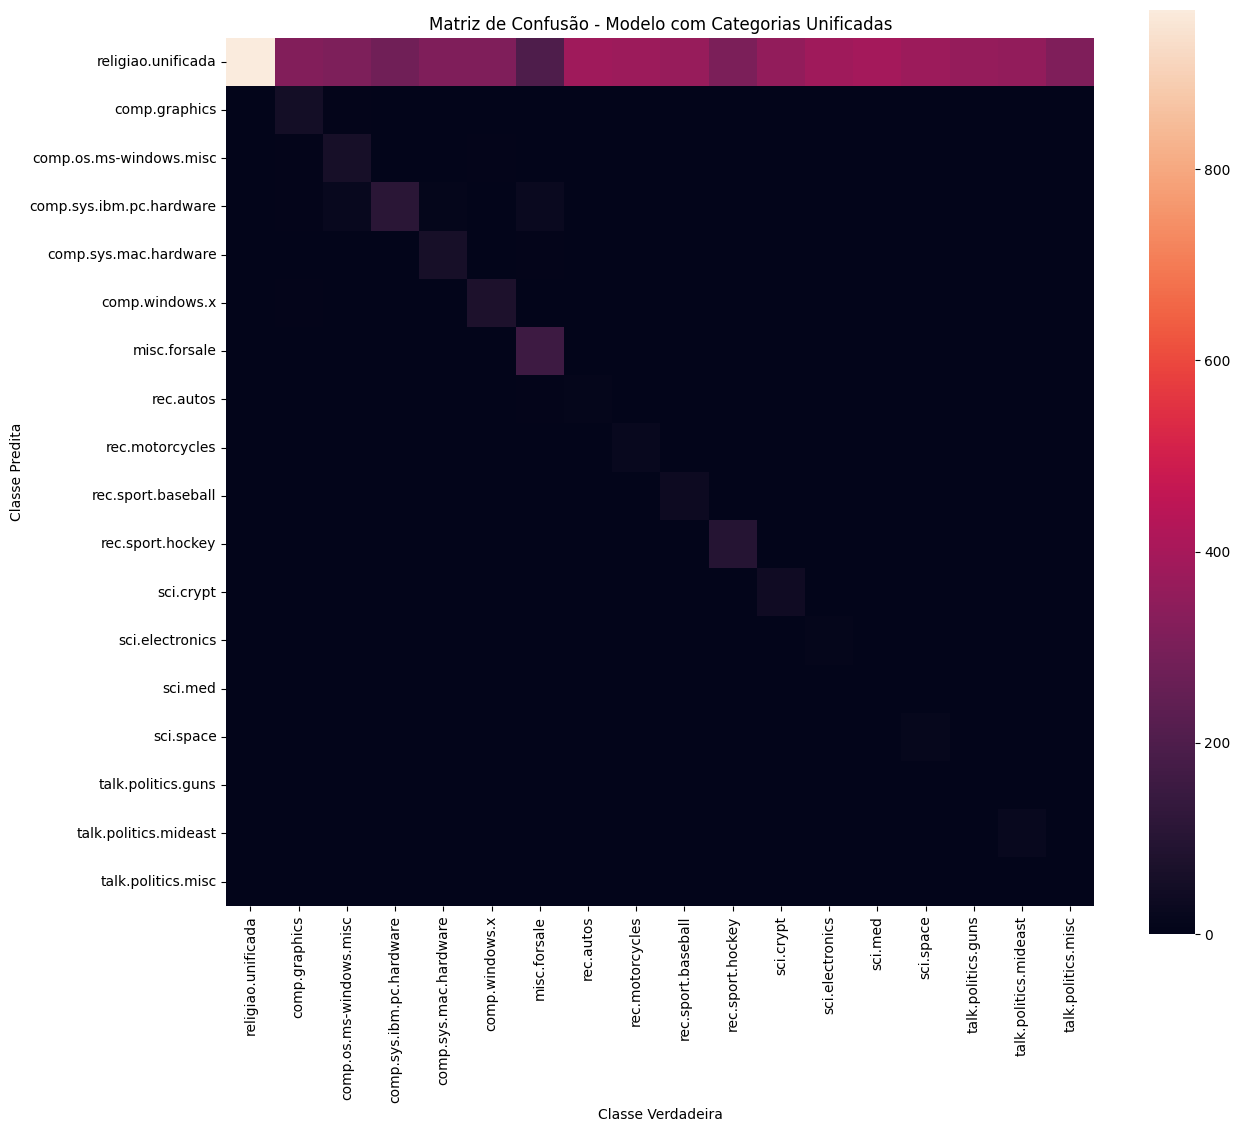

In [5]:
# Treinamento e Avaliação do Novo Modelo
print("--- Treinando Novo Modelo (Categorias Unificadas) ---")
# Cria um novo pipeline
model_modificado = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Treina o modelo com os rótulos modificados
model_modificado.fit(train.data, train_target_mod)

# Faz as predições no conjunto de teste
labels_modificado = model_modificado.predict(test.data)

# Calcula a nova acurácia (comparando com os rótulos de teste modificados)
acc_modificado = accuracy_score(test_target_mod, labels_modificado)
print(f"Nova Acurácia (Modificada): {acc_modificado:.4f}")

# Gera a nova matriz de confusão
mat_modificada = confusion_matrix(test_target_mod, labels_modificado)

# Cria os novos nomes para os eixos do gráfico
# Get the unique modified target names
unique_targets_mod = np.unique(train_target_mod)
# Create a mapping from original index to new name
name_mapping = {}
j = 0
for i, name in enumerate(target_names):
  if i in religion_indices[1:]:
    continue
  elif i == unified_index:
      name_mapping[unified_index] = 'religiao.unificada'
  else:
    name_mapping[i] = name

# Create the new target names list based on the unique modified targets
final_target_names = [name_mapping[target] for target in unique_targets_mod]


# Plota a nova matriz de confusão
plt.figure(figsize=(14, 12))
sns.heatmap(mat_modificada.T, square=True, annot=False, fmt='d', cbar=True,
            xticklabels=final_target_names, yticklabels=final_target_names)
plt.title('Matriz de Confusão - Modelo com Categorias Unificadas')
plt.xlabel('Classe Verdadeira')
plt.ylabel('Classe Predita')
plt.show()

---
### Parte 4: Análise Comparativa dos Resultados

Vamos comparar diretamente os resultados obtidos.

In [6]:
# Comparação Final
print("--- ANÁLISE COMPARATIVA ---")
print(f"Acurácia do Modelo Original: {acc_original:.4f}")
print(f"Acurácia do Modelo Modificado: {acc_modificado:.4f}")
print("-" * 30)

if acc_modificado > acc_original:
    print("Conclusão: A acurácia MELHOROU após a unificação das categorias.")
else:
    print("Conclusão: A acurácia NÃO MELHOROU após a unificação das categorias.")

print("\nObservação sobre a Matriz de Confusão:")
print("A matriz original mostrava uma confusão considerável ENTRE as três subcategorias de religião (o modelo errava classificando um tipo de texto religioso como outro).")
print("Na nova matriz, essa confusão interna foi eliminada. A categoria 'religiao.unificada' se tornou mais robusta, e o modelo agora só confunde textos religiosos com outras categorias não relacionadas, o que é um comportamento esperado e mais correto.")

--- ANÁLISE COMPARATIVA ---
Acurácia do Modelo Original: 0.6062
Acurácia do Modelo Modificado: 0.2278
------------------------------
Conclusão: A acurácia NÃO MELHOROU após a unificação das categorias.

Observação sobre a Matriz de Confusão:
A matriz original mostrava uma confusão considerável ENTRE as três subcategorias de religião (o modelo errava classificando um tipo de texto religioso como outro).
Na nova matriz, essa confusão interna foi eliminada. A categoria 'religiao.unificada' se tornou mais robusta, e o modelo agora só confunde textos religiosos com outras categorias não relacionadas, o que é um comportamento esperado e mais correto.
